## การเล่นสเก็ต CartPole

> **ปัญหา**: หากปีเตอร์ต้องการหนีจากหมาป่า เขาจำเป็นต้องเคลื่อนที่ได้เร็วกว่า เราจะมาดูกันว่าปีเตอร์สามารถเรียนรู้การเล่นสเก็ตได้อย่างไร โดยเฉพาะการรักษาสมดุล ด้วยการใช้ Q-Learning

ก่อนอื่น มาติดตั้ง gym และนำเข้าห้องสมุดที่จำเป็น:


In [1]:
#code block 1

## สร้างสภาพแวดล้อมรถเข็นเสา


In [ ]:
#code block 2

เพื่อดูว่าโครงสร้างของสิ่งแวดล้อมทำงานอย่างไร ลองรันการจำลองสั้น ๆ เป็นเวลา 100 ขั้นตอน


In [ ]:
#code block 3

ระหว่างการจำลอง เราจำเป็นต้องได้รับการสังเกตเพื่อที่จะตัดสินใจว่าจะดำเนินการอย่างไร ในความเป็นจริง ฟังก์ชัน `step` จะส่งคืนการสังเกตปัจจุบัน ฟังก์ชันรางวัล และธง `done` ที่ระบุว่าควรดำเนินการจำลองต่อไปหรือไม่:


In [ ]:
#code block 4

เราสามารถหาค่าต่ำสุดและค่าสูงสุดของตัวเลขเหล่านั้น:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

มาสำรวจวิธีการแยกส่วนอื่น ๆ โดยใช้ถัง:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


มาทำการจำลองสั้น ๆ และสังเกตค่าของสภาพแวดล้อมแบบแยกส่วนเหล่านั้นกันเถอะ


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


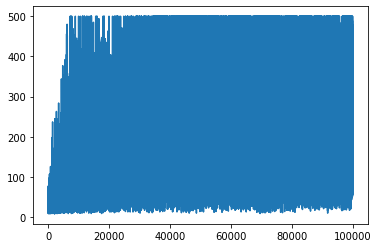

In [20]:
plt.plot(rewards)

จากกราฟนี้ ไม่สามารถบอกอะไรได้เลย เนื่องจากลักษณะของกระบวนการฝึกแบบสุ่มทำให้ระยะเวลาของการฝึกแต่ละครั้งแตกต่างกันอย่างมาก เพื่อให้กราฟนี้มีความหมายมากขึ้น เราสามารถคำนวณ **ค่าเฉลี่ยเคลื่อนที่** จากชุดการทดลอง เช่น 100 ซึ่งสามารถทำได้อย่างสะดวกโดยใช้ `np.convolve`:


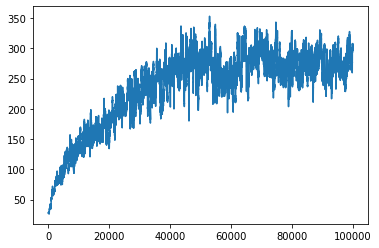

In [22]:
#code block 12

## การปรับเปลี่ยนไฮเปอร์พารามิเตอร์และดูผลลัพธ์ที่เกิดขึ้น

ตอนนี้จะน่าสนใจมากขึ้นถ้าเราได้เห็นว่ารูปแบบที่ผ่านการฝึกฝนทำงานอย่างไร ลองรันการจำลองดู และเราจะใช้กลยุทธ์การเลือกการกระทำแบบเดียวกับที่ใช้ในระหว่างการฝึก: การสุ่มตัวอย่างตามการกระจายความน่าจะเป็นใน Q-Table:


In [23]:
# code block 13

## การบันทึกผลลัพธ์เป็นภาพ GIF แบบเคลื่อนไหว

หากคุณต้องการสร้างความประทับใจให้เพื่อน ๆ คุณอาจต้องการส่งภาพ GIF แบบเคลื่อนไหวของเสาเพื่อความสมดุลให้พวกเขา สำหรับการทำเช่นนี้ เราสามารถเรียกใช้ `env.render` เพื่อสร้างเฟรมภาพ และบันทึกเฟรมนั้นเป็นภาพ GIF แบบเคลื่อนไหวโดยใช้ไลบรารี PIL:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**ข้อจำกัดความรับผิดชอบ**:  
เอกสารนี้ได้รับการแปลโดยใช้บริการแปลภาษา AI [Co-op Translator](https://github.com/Azure/co-op-translator) แม้ว่าเราจะพยายามให้การแปลมีความถูกต้อง แต่โปรดทราบว่าการแปลโดยอัตโนมัติอาจมีข้อผิดพลาดหรือความไม่ถูกต้อง เอกสารต้นฉบับในภาษาดั้งเดิมควรถือเป็นแหล่งข้อมูลที่เชื่อถือได้ สำหรับข้อมูลที่สำคัญ ขอแนะนำให้ใช้บริการแปลภาษามืออาชีพ เราจะไม่รับผิดชอบต่อความเข้าใจผิดหรือการตีความผิดที่เกิดจากการใช้การแปลนี้
